# Portada



---

## ***Ventas de Video Juegos - Analisis***

*   *Camila Ramos*
*   *EAD2 2022* 
---






# Indice

1.   Introducción
2.   Planteo del problema
3.   Objetivos
 - 3.1 General
 - 3.2 Especificos
4.   Explicacion de la base de datos y definicion de variables 
 - 4.1 Instalacion e importacion de librerias
 - 4.2 Carga de la base de datos
 - 4.3 Descripcion del Data Set
 - 4.4 Limpieza y pre - procesamiento de la base de datos
5. Análisis exploratorio, descriptivo y visual de los datos
 - 5.1 Analisis general de Ventas 
 - 5.2 Cómo evolucionaron las ventas de Videojuegos a lo largo del tiempo?
 - 5.3 Juegos publicados y ventas a nivel Plataforma
 - 5.4 Cúales son los Generos mas populares a nivel Mundial y Regional?
6. Contrastación de hipótesis y demostración visual de resultados
7. Conclusiones










# 1.Introducción

Un Videojuego es un juego electrónico que se puede jugar en un dispositivo,como por ejemplo una consola (Xbox360,Nintendo Wii, etc) una computadora o un smartphone. 

Dependiendo de la plataforma, los videojuegos se pueden subcategorizar en juegos de computadora y juegos de consola. Sin embargo, en los últimos años y con la aparición de las redes sociales,los avances tecnologicos y los dispositivos smart como celulares y tablets se introdujeron nuevas categorías, como los juegos "móviles" y "sociales" y "juegos de streaming". 

Los videojuegos han recorrido un largo camino desde que surgieron los primeros en la década de 1970. En la actualidad existe una gran variedad de opciones de videojuegos, algunos ofrecen gráficos fotorrealistas y pueden simular la realidad hasta un punto sorprendente en muchos casos ademas de estar disponibles en infinidad de dispositivos por lo que su uso no esta limitado a una consola especifica.


# 2.Planteo del problema

Se cuenta con una base de datos de VideoJuegos de consola publicados el periodo 1980 hasta 2020 con datos de ventas a nivel mundial y por region para analizar el comportamiento de las mismas. La base ademas cuenta con datos correspondientes a criticas de usuarios del Sitio VG Chartz y Rating de los criticos del Entertainment Software Rating Board.


# 3.Objetivos

### 3.1 General
Analizar el comportamiento que tienen las ventas de los videojuegos publicados en el periodo de estudio a nivel Mundial y Regional y obtener insights sobre la popularidad de las diferentes consolas y generos de videojuegos mas conocidas.

### 3.2 Específicos



* Estudiar el comportamiento evolutivo de las ventas por año en el periodo 1980-2020 

* Analizar el volumen de ventas para cada Plataforma y determinar que Plataformas publicaron mas juegos en el periodo de estudio 

* Determinar qué Géneros son mas populares a nivel mundial y si existe alguna relacion en cuanto a las Regiones

* Comprobar mediante contrastacion de hipótesis si las ventas mundiales en 2010 superan a las del año 2000


# 4.Explicacion de la base de datos y definicion de variables

### 4.1 Instalacion e importacion de librerias

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 4.2 Carga de la base de datos (Data Set)

**[Link a la base de datos](https://github.com/branchesok/Camila_Ramos_EAD2_2022/blob/e8b766215bf8e2468553aa8c492f78e238c59d71/VIDEO_GAMES_SALES.csv)**

In [63]:
data = pd.read_csv("VIDEO_GAMES_SALES.csv")

In [64]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### 4.3 Descripcion del Data Set

In [65]:
data.shape

(16719, 16)

El Data Set contiene **16719 filas y 16 columnas**

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [67]:
# Cantidad de valores nulos para cada columna

data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [68]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

**Definicion para cada una de las columnas del Data Set:**

* **Name** : Nombre/Titulo del VideoJuego
* **Platform** : Plataforma en la que se lanzó el mismo (Por ejemplo (PC, PS4 ,etc)
* **Year_of_Release** : Año en el que fue lanzado el VideoJuego
* **Genre** : Genero del Videojuego (Clasificacion dada por el sitio VG Chartz)
* **Publisher** : Compañia a la que pertenece (Ej: Nintendo)
* **NA_Sales**  : Unidades vendidas en Norte America (Millones)
* **EU_Sales** : Unidades vendidas en Europa (Millones)
* **JP_Sales** : Unidades vendidas en Japon (Millones)
* **Other_Sales** : Unidades vendidas en el resto del mundo(Millones)
* **Global_Sales** : Unidades vendidas a nivel Global (Millones)
* **Critic_Score** : Puntaje dado al videojuego por los criticos (0 - 100)
* **Critic_Count** : Cantidad de puntajes recibidos por criticos
* **User_Score** :  Puntaje dado al videojuego por los usuarios de VG Chartz (0 - 100)
* **User_Count** : - Cantidad de puntajes de usuarios recibidos
* **Developer** : Nombre de la Compañia que desarrollo el Video Juego
* **Rating** : Clasificacion Oficial de ESRB (Entertainment Software Rating Board)




In [69]:
#comprobar si existen filas duplicadas en el Data Set

data.duplicated().sum()

0

In [70]:
#revisar periodo de tiempo en años que abarca el Data Set

max_date =data.Year_of_Release.max()
min_date =data.Year_of_Release.min()

print(min_date,"-",max_date)

1980.0 - 2020.0


In [71]:
data.Name.count()

16717

In [72]:
# comprobamos si existen nombres de Videojuegos que se repiten

nombres_repetidos = data['Name'].value_counts() 
print(nombres_repetidos) 

Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11562, dtype: int64


In [73]:
# identificar que variables pueden ser diferentes para un mismo titulo o nombre de juego

data.loc[data.Name == 'Ratatouille']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1598,Ratatouille,DS,2007.0,Action,THQ,0.49,0.62,0.0,0.14,1.25,NaN,NaN,NaN,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,THQ,0.31,0.00,0.0,0.53,0.85,65.0,9.0,8.0,11.0,Asobo Studio,E
3069,Ratatouille,PSP,2007.0,Action,THQ,0.22,0.27,0.0,0.16,0.66,64.0,7.0,7.1,7.0,Locomotive Games,E
3902,Ratatouille,PS3,2007.0,Action,THQ,0.09,0.32,0.0,0.10,0.51,55.0,8.0,4.8,4.0,Heavy Iron Studios,E
3948,Ratatouille,Wii,2007.0,Action,THQ,0.43,0.03,0.0,0.04,0.50,62.0,16.0,6.7,12.0,Asobo Studio,E
6399,Ratatouille,X360,2007.0,Action,THQ,0.23,0.02,0.0,0.02,0.27,56.0,14.0,NaN,NaN,Heavy Iron Studios,E
7682,Ratatouille,GBA,2007.0,Action,THQ,0.14,0.05,0.0,0.00,0.20,65.0,4.0,NaN,NaN,Helixe,E
9016,Ratatouille,GC,2007.0,Action,THQ,0.11,0.03,0.0,0.00,0.14,60.0,7.0,5.6,7.0,Asobo Studio,E
14516,Ratatouille,PC,2007.0,Action,THQ,0.01,0.01,0.0,0.00,0.03,NaN,NaN,7.9,9.0,Asobo Studio,E


**Observaciones**
- La Base de Datos contiene 6 variables categoricas y 10 numericas
- No existen filas duplicadas
- Existen celdas con datos vacios o nulos como Name, Year_Of Release y Publisher
- Aproximadamente el 50% de los Videojuegos no tienen datos de Critics_Score,Users_Score, Developer y Rating
- La columna Year Of release se encuentra en formato float y debera convertirse a int
- Se asume que el dato en las columnas de Ventas (_Sales) se refiere a cantidad de unidades del videojuego vendidas expresadas en Millones. Como referencia se toma el valor para el Videojuego Wii Sports de la siguente [fuente](https://es.wikipedia.org/wiki/Anexo:Videojuegos_m%C3%A1s_vendidos_de_la_Wii) 
- El Nombre de un VideoJuego puede repetirse ya que un mismo Juego puede lanzarse para diferentes plataformas o por diferentes desarrolladores e incluso tener distintas fechas de lanzamiento


### 4.4 Limpieza y pre - procesamiento de la base de datos

In [74]:
#para obtener los nombres de las columnas en formato snake_case se debe convertir las mayusculas a minsculas 

snake_case_dict = {}

labels_to_snake_case = lambda label: label.lower()

for label in data.columns:
    snake_case_dict[label] = labels_to_snake_case(label)

games_sales_data = data.rename(columns= snake_case_dict)

games_sales_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

Se elige eliminar aquellos registros con Nombre, Año y Compañia nulos ya que estas fueron seleccionadas como las prinicpales variables cateogricas para el analisis de ventas.

In [75]:
games_sales_data = games_sales_data.dropna(subset=['name', 'year_of_release', 'genre', 'publisher'])

#compruebo cantidad de registros nulos

games_sales_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8434
critic_count       8434
user_score         8955
user_count         8955
developer          6512
rating             6649
dtype: int64

In [76]:
#convertir la columna Año a formato int

games_sales_data.year_of_release =games_sales_data.year_of_release.astype('int')

type(games_sales_data.year_of_release[0])

numpy.int64

Existen algunas columnas con mas del 50% de valores nulos con respecto al total de filas del Data Set entre ellos, Puntajes y Rating. Esto se debe a que el Sitio VG Chartz se lanzo en 2006 ([fuente](https://www.vgchartz.com/)) y el ESRB en 1994 ([fuente](https://www.esrb.org/history/)) y la base de datos contiene juegos lanzados en el periodo 1980-2020. A efectos del analisis de ventas se van a seleccionar solo las columnas del Data Set que tengan dicha informacion.

In [77]:
games_sales_data = games_sales_data.loc[:,'name':'global_sales'] 
games_sales_data.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Data luego de la limpieza** :

In [78]:
games_sales_data.shape

(16416, 10)

In [79]:
games_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16416 non-null  object 
 1   platform         16416 non-null  object 
 2   year_of_release  16416 non-null  int64  
 3   genre            16416 non-null  object 
 4   publisher        16416 non-null  object 
 5   na_sales         16416 non-null  float64
 6   eu_sales         16416 non-null  float64
 7   jp_sales         16416 non-null  float64
 8   other_sales      16416 non-null  float64
 9   global_sales     16416 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.9+ MB


# 5.Análisis exploratorio, descriptivo y visual de los datos

### 5.1 Analisis general de Ventas

In [80]:
games_sales_data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16416.000000,16416.000000,16416.000000,16416.000000
mean,0.264129,0.146034,0.078623,0.047670
std,0.819028,0.507134,0.311348,0.188156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [81]:
games_sales_data[['global_sales']].describe()

,global_sales
count,16416.000000
mean,0.536708
std,1.559885
min,0.010000
25%,0.060000
50%,0.170000
75%,0.470000
max,82.530000


In [82]:
#top 10 de Juegos con mayor cantiadad de unidades vendidas mundialmente

games_sales_data.sort_values('global_sales', ascending=False)[:10]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


- La media de unidades vendidas en la region Norteamericana es considerablemente mayor que en el resto de las regiones con un maximo de 41.36 millones de copias vendidas

- El valor maximo de unidades vendidas a nivel mundial es de 82.54 Millones de copias y corresponde al Juego Wii Sports

### 5.2 Cómo evolucionaron las ventas de Videojuegos a lo largo del tiempo?

In [83]:
#importo librerias para graficos

import matplotlib.pyplot as plt

import seaborn as sns

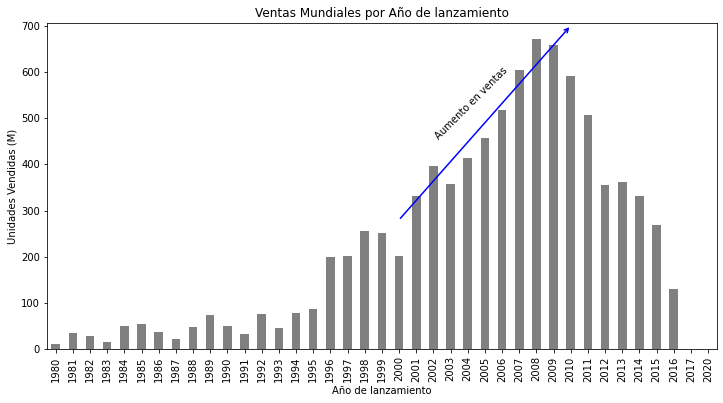

In [84]:
#grafico ventas mundiales por año de lanzamiento

ventas_mundiales=games_sales_data.groupby('year_of_release')['global_sales'].sum()

ventas_mundiales.plot(kind='bar',figsize=(12,6),color ='grey')
plt.xlabel('Año de lanzamiento') 
plt.ylabel('Unidades Vendidas (M)') 
plt.title('Ventas Mundiales por Año de lanzamiento')
plt.annotate('Aumento en ventas',
            xy = (22, 450),
            rotation= 45,
            va = 'bottom',
            ha = 'left')
plt.annotate('',
            xy=(30, 700),
            xytext=(20, 280),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=1.5))
plt.show()

* Se observa un aumento en ventas mundiales a fines de la decada de los 90' con un maximo de ventas comprendido entre el 2008 y 2009.

* A partir del año 2010 se puede ver una clara tendencia a la baja en ventas mundiales de VideoJuegos

In [85]:
#juegos mas vendidos mundialmenteen el año 2008

games_sales_data.loc[games_sales_data.year_of_release == 2008 ].sort_values('global_sales',ascending=False ).head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
39,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.62,2.55,2.66,1.01,12.84
51,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01
57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50
90,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.76,1.72,2.69,0.54,7.72


* El juego con mas ventas a nivel mundial en el año 2008 (año record en ventas del periodo analizado) es el Mario Kart para la consola Wii de Nintendo con un total de 35.5 Millones de Unidades vendidas
* El siguiente juego con mayor cantidad de ventas mundiales en el mismo año (Super Smash Bros.Brawl) representa menos del 40% de las ventas de Mario Kart de la misma consola.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


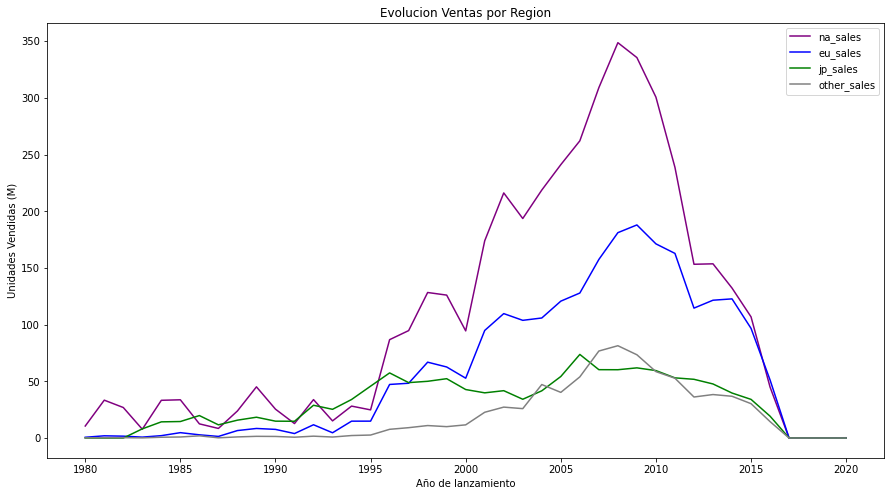

In [86]:
ventas_region_df=games_sales_data.groupby('year_of_release')['na_sales','eu_sales','jp_sales','other_sales'].sum()
# ventas_region_df.plot()

colors = ['purple', 'blue', 'green', 'grey', 'orange']
ventas_region_df.plot(kind='line', stacked=False, figsize=(15, 8), color = colors)
plt.title('Evolucion Ventas por Region')
plt.ylabel('Unidades Vendidas (M)')
plt.xlabel('Año de lanzamiento')
plt.show()

* En este grafico se evidencia que la gran mayoria de las ventas mundiales corresponde a las regiones de Norteamerica y Europa
* El comportamiento con respecto a la tendencia en el aumento de ventas regionales es similar al de las ventas mundiales, excepto para Japon donde el crecimiento en ventas es menos pronunciado.
* Para Japon , el maximo de ventas se alcanzo en el año 2006 y en el siguiente grafico se puede ver como existe cierta estacionalidad en las ventas

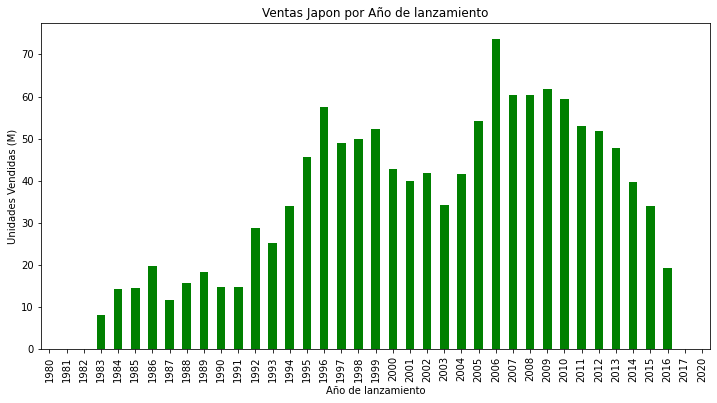

In [87]:
ventas_mundiales=games_sales_data.groupby('year_of_release')['jp_sales'].sum()

ventas_mundiales.plot(kind='bar',figsize=(12,6),color ='green')
plt.xlabel('Año de lanzamiento') 
plt.ylabel('Unidades Vendidas (M)') 
plt.title('Ventas Japon por Año de lanzamiento')
plt.show()

### 5.3 Juegos publicados y ventas a nivel Plataforma:

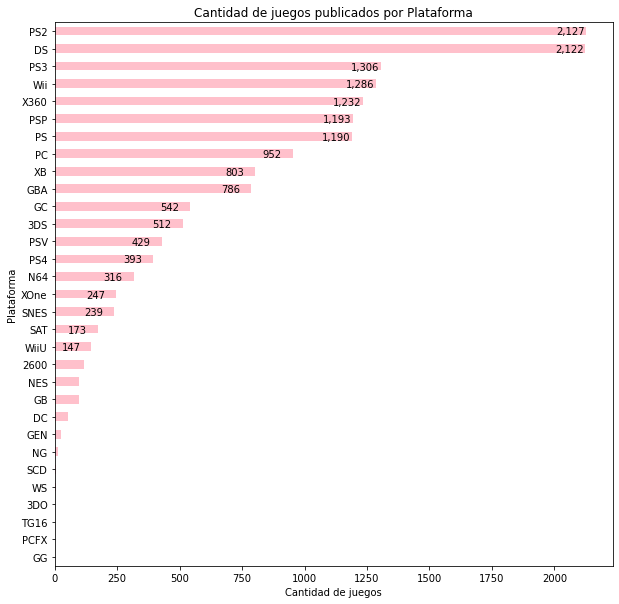

In [88]:
cant_juegos_plataforma = games_sales_data.groupby('platform')['name'].count().sort_values(ascending=True)

cant_juegos_plataforma.plot(kind='barh',figsize=(10,10),color='pink')
plt.xlabel('Cantidad de juegos') 
plt.ylabel('Plataforma') 
plt.title('Cantidad de juegos publicados por Plataforma')
for index, value in enumerate(cant_juegos_plataforma):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-120, index-0.2), color='black')
plt.show()

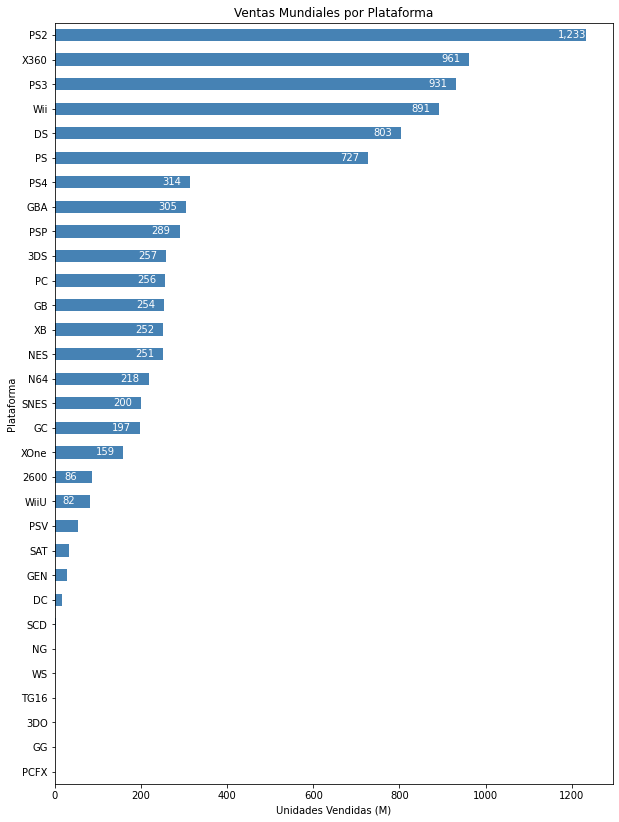

In [89]:
ventas_plataforma=games_sales_data.groupby('platform')['global_sales'].sum().sort_values(ascending=True)

ventas_plataforma.plot(kind='barh',figsize=(10,14),color='steelblue')
plt.xlabel('Unidades Vendidas (M)') 
plt.ylabel('Plataforma') 
plt.title('Ventas Mundiales por Plataforma')
for index, value in enumerate(ventas_plataforma):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-65, index-0.1), color='white')
plt.show()

* Las plataformas con mayor cantidad de juegos publicados a nivel mundial son 
   1. Sony PlayStation 2 (Lanzamiento 2000)
   2. Nintendo DS (Lanzamiento 2004)
   3. Sony PlayStation 3 (Lanzamiento 2006)

* Las plataformas con mayor cantidad de ventas a nivel mundial son
   1. Sony PlayStation 2
   2. Microsoft XBox360 (Lanzamiento 2005)
   3. Sony PlayStation 3

  siendo Nintendo DS nro 5 en ventas mundiales a pesar de ser 2ndo lugar en cantidad de juegos publicados

* La cantidad de juegos publicada para PS2 y PS3 y las posiciones para cada una en el ranking pueden explicarse con la fecha de lanzamiento de cada consola siendo PS2 mas antigua que PS3 y por ende con mayor cantidad de juegos publicados en el periodo analizado.


### 5.4 Qué generos son los mas populares a nivel mundial y regional?

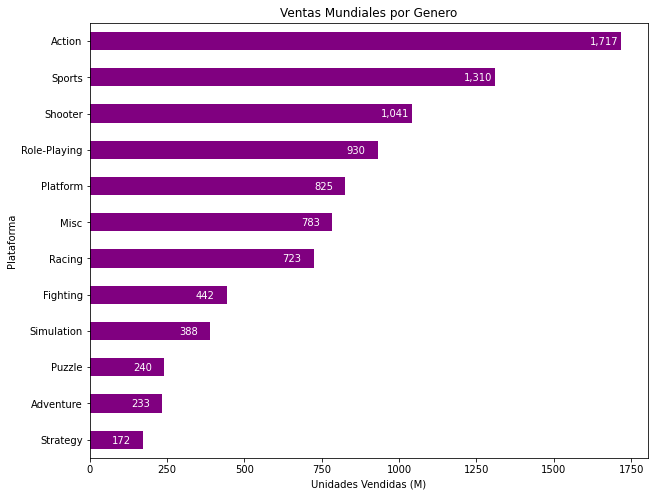

In [90]:
ventas_plataforma=games_sales_data.groupby('genre')['global_sales'].sum().sort_values(ascending=True)

ventas_plataforma.plot(kind='barh',figsize=(10,8),color='purple')
plt.xlabel('Unidades Vendidas (M)') 
plt.ylabel('Plataforma') 
plt.title('Ventas Mundiales por Genero')
for index, value in enumerate(ventas_plataforma):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-100, index-0.1), color='white')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


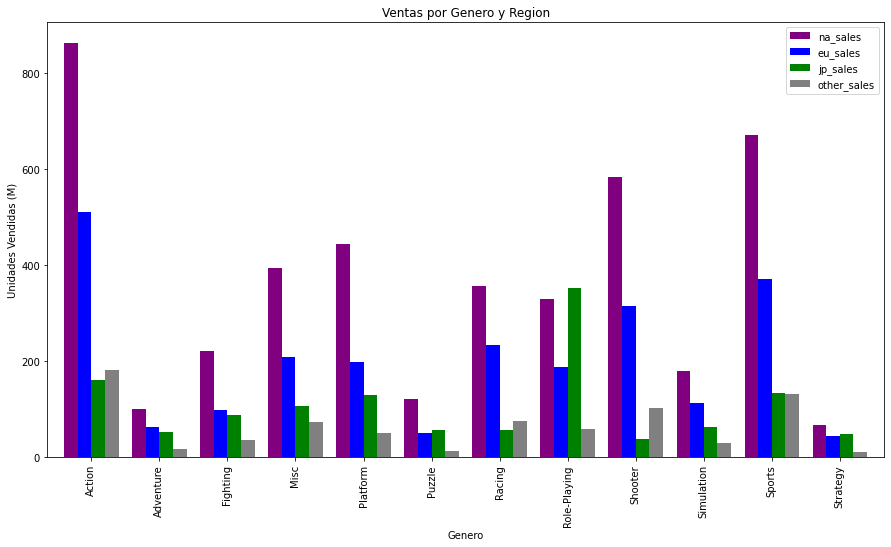

In [91]:
ventas_genre_df=games_sales_data.groupby('genre')['na_sales','eu_sales','jp_sales','other_sales'].sum()

ventas_genre_df.plot(kind='bar',figsize=(15,8),color= colors,width=0.8)
plt.xlabel('Genero') 
plt.ylabel('Unidades Vendidas (M)') 
plt.title('Ventas por Genero y Region')
plt.show()

* Los juegos con mayor cantidad de ventas a nivel mundial son los correspondientes a los generos de Accion, Deportes (Sports) y Shooter (Tirador). Este ultimo genero se caracteriza por uso de armas de fuego para matar a los enemigos. El 4to juego mas importante en cuanto a ventas mundiales es el de Rol - Playing o Juego de Rol

* Si analizamos el nivel de ventas por Genero aperturado por Region se puede observar un comportamiento similar para las regiones de NorteAmerica y Europa las cuales replican el comportamiento a nivel mundial ya que concentran la mayor cantidad de ventas.

* Para la region de Japon el Genero mas popular es el de Juegos de Rol

# 6.Planteo y contrastación de hipótesis - demostración visual de resultados

Se quiere comparar las ventas mundiales del año 2000 versus 2010 y comprobar que las ventas del 2010 superan a las ventas alcanzadas en 2000 a nivel mundial. Para ello se hace el planteo de las siguientes hipotesis:

* h1 : Las ventas globales en 2010 superan a las de 2000
* h0 : Las ventas de 2010 no superan a las de el año 2000


In [92]:
#cantidad de muestra ventas 2010
ventas_2010 = games_sales_data.loc[games_sales_data.year_of_release == 2010 ].global_sales
len(ventas_2010)

1253

In [93]:
#cantidad de muestra ventas 2000
ventas_2000 = games_sales_data.loc[games_sales_data.year_of_release == 2000 ].global_sales
len(ventas_2000)

350

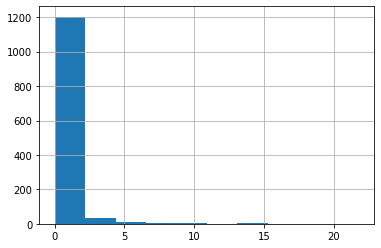

In [94]:
#grafico histograma para las ventas de 2010
ventas_2010.hist()

In [95]:
ventas_2010.describe()

count    1253.000000
mean        0.471213
std         1.288432
min         0.010000
25%         0.050000
50%         0.150000
75%         0.390000
max        21.810000
Name: global_sales, dtype: float64

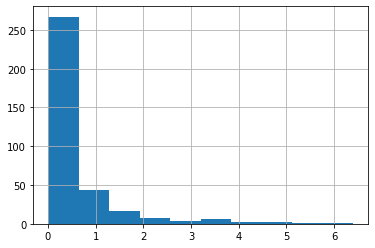

In [96]:
#grafico de histograma para ventas 2000
ventas_2000.hist()

In [97]:
ventas_2000.describe()

count    350.000000
mean       0.575943
std        0.882631
min        0.010000
25%        0.110000
50%        0.250000
75%        0.597500
max        6.390000
Name: global_sales, dtype: float64

Para la comprobacion de hipotesis se realiza la prueba Z de dos muestras donde

$Z = (x1-x2) /\sqrt{sigma_1^2/n1 +sigma_2^2/n2}$

A continuacion se calcula cada una de las variables 

In [98]:
x1 = ventas_2010.sum()
x1

590.4300000000001

In [99]:
x2 = ventas_2000.sum()
x2

201.58

In [100]:
n1=len(games_sales_data.loc[games_sales_data.year_of_release == 2010 ])
n1

1253

In [101]:
n2=len(games_sales_data.loc[games_sales_data.year_of_release == 2000 ])
n2

350

In [102]:
sigma_1 =pow(1.288432,2)
sigma_1

1.660057018624

In [103]:
sigma_2= pow(0.882631,2)
sigma_2

0.7790374821610001

In [104]:
# calculo valor Z
import numpy as np

z=(x1-x2)/np.sqrt(sigma_1/n1+sigma_2/n2)
print(round(z,4))

6525.6817


In [105]:
#Calculo el P valor
import scipy.stats as stats

p=1-stats.norm.cdf(z)
p

0.0

In [106]:
from decimal import Decimal
Decimal(p)

Decimal('0')

In [107]:
sig =0.05
print(p<sig)

True


In [108]:
def test_h0():
  if p<sig:
    result='Se rechaza H0'
  else:
    result='Se acepta H1'
  return result

test_h0()

'Se rechaza H0'

De acuerdo con estos resultados, se puede inferir que las ventas globales en 2010 superan a las de 2000

# 7.Conclusiones


El juego con mayor cantidad de ventas a nivel mundial en el periodo analizado es el Wii Sports publicado en 2008 por Nintendo y alcanzo en dicho año 82.54 millones de copias vendidas. 

En ese mismo año se alcanza el maximo de unidades vendidas a nivel mundial y para las regiones de Norteamerica y Europa que concentran la mayor cantidad de ventas.

El comportamiento observado para las ventas de Japon indica que existe estacionalidad cuando se observa la evolucion de ventas por año en el periodo 1980 - 2020 con un maximo de ventas alcanzado en el año 2006 a diferencia del resto de las regiones donde se ve un aumento pronunciado en ventas entre los años 2000 y 2008 (maximo) que luego decae. 

Del análisis de ventas por plataforma puede concluirse que las plataformas con mas juegos publicados en el periodo analizado son Sony PlayStation 2, PlayStation 3 y Nintendo DS. Si bien las 2 primeras, se encuentran en el top 3 de plataformas con mayor cantidad de ventas en dicho periodo a nivel mundial, para Nintendo DS, se observo una cantidad de ventas significativamente menor en comparación con el resto quedando en 5to lugar a nivel de ventas mundiales.

Los generos mas populares a nivel mundial (con mayor cantiad de unidades vendidas) son los de Accion, Deportes y de modalidad Shooter. Este comportamiento se replica para las regiones de Norteamerica y Europa que concentran la mayor cantidad de ventas , mientras que para Japon la tendencia es muy distinta y el genero mas popular es el de Juegos de Rol seguido por Accion y Deportes.
 
Mediante contrastacion de hipótesis se pudo comprobar que  las ventas mundiales en 2010 superan a las del año 2000